# Modelos de Regresión Logística para Pedigrí Forense.

## Configuración de la sección

En esta sección se realiza lo siguiente:
- Importado de las librerías necesarias para trabajar en todo el *notebook*.
- Exploración de los datos.
- Separación de los datos en entrenamiento y pruebas.
- Selección de las variables X y Y para el entrenamiento del modelo.

In [171]:
# Imports
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [157]:
# Reading the CSV files with pandas

df_train = pd.read_csv("../data/processed/train50.csv")
df_test = pd.read_csv("../data/processed/test50.csv")

In [158]:
# Exploring the data

df_train.head()

,Shared_Markers,k0,k1,k2,Share_allele,Value,True_positive,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel
0,15,0,4,11,26,236354.0,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100000-999999,12102,F,65402,F
1,15,0,7,8,23,184374.0,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100000-999999,23802,S,99602,F
2,15,0,6,9,24,83900.6,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,10000-99999,47302,S,62402,F
3,15,0,10,5,20,41143.0,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,10000-99999,116102,F,116702,F
4,15,0,8,7,22,30327.8,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,10000-99999,122502,F,83702,S


In [159]:
# Feature columns for the logistic regression model

feature_colums = ["Shared_Markers", "k0", "k1", "k2", "Share_allele", "Value"]

In [160]:
# Splitting data into training and testing sets

x_train = df_train[feature_colums]
y_train = df_train["True_positive"]
x_test = df_test[feature_colums]
y_test = df_test["True_positive"]

In [161]:
# Base Logistic Regression model 

log_model = LogisticRegression(n_jobs=-1) # Base model

---

# Regresión logística con LR 

En esta sección se encuentra un modelo de regresión logística **sin optimizar**, tomando en cuenta las variables de *LR y True_positives* haciendo una comparativa entre un modelo de regresión logística con múltiples variables ***("Shared_Markers", "k0", "k1", "k2", "Share_allele", "Value (LR)")***

In [162]:
# Prepare data for logistic regression with only LR column

x_train_lr = df_train["Value"]
x_test_lr = df_test["Value"]

In [163]:
# Train a Logistic Regression model with only LR column

log_model.fit(x_train_lr.values.reshape(-1, 1), y_train)
y_pred_lr = log_model.predict(x_test_lr.values.reshape(-1, 1))
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

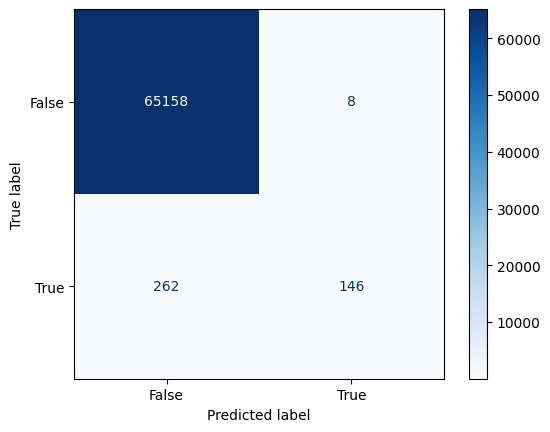

In [ ]:
# Print the confusion matrix

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=log_model.classes_)
cm_display.plot(cmap=plt.cm.Blues)

In [ ]:
print("===== Metrics for Logistic Regression Model =====")
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))

         ==== Logistic Regression with only LR column ====
Precision: 0.948051948051948
Recall: 0.35784313725490197
F1 Score: 0.5195729537366548
Accuracy: 0.9958825144111996
ROC AUC: 0.6788601869253363


---

## Regresión logística base con múltiples variables

Modelo de regresión logística entrenado con hiperparámetros por defecto e impresión de la matriz de confusión.

In [148]:
# Training and evaluation of the logistic regression model

log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


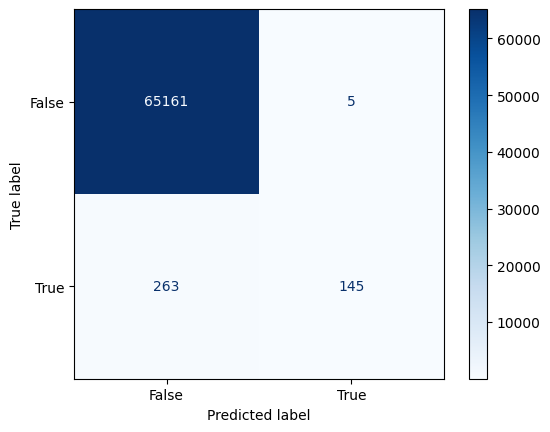

In [149]:
# Print the confusion matrix

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
cm_display.plot(cmap=plt.cm.Blues)

In [ ]:
print("===== Metrics for Logistic Regression Model =====")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Precision: 0.9666666666666667
Recall: 0.3553921568627451
F1 Score: 0.5197132616487455
Accuracy: 0.9959130143044499
ROC AUC: 0.6776577148675509


---

## Regresión logística con múltiples variables aplicando Grid Search

Búsqueda de los mejores hiperparámetros usando Grid Search con variables múltiples.

In [150]:
# Hyperparameter tuning with Grid Search

param_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'max_iter': [100, 200, 300],
        'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'liblinear', 'sag', 'saga'],
        'C': np.logspace(-4, 4, 20)
    }
]

In [151]:
# Traning a Logistic Regression model with Grid Search

model_grid = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
best_model = model_grid.fit(x_train, y_train)
y_best_pred = best_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_best_pred)

/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See h

In [152]:
# Print the best parameters found by Grid Search

print("Best parameters found by Grid Search:")
print(best_model.best_params_)
best_model.best_estimator_

Best parameters found by Grid Search:
{'C': np.float64(0.0001), 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


,penalty,'l2'
,dual,False
,tol,0.0001
,C,np.float64(0.0001)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Los mejores parámetros para el modelo de regresión logística usando Grid Search son:

```{'C': np.float64(0.0001), 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}```

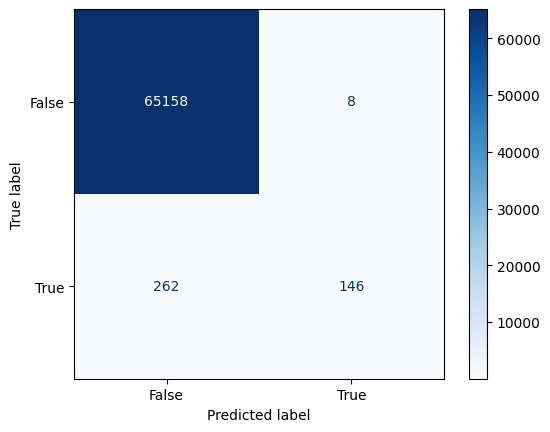

In [153]:
# Print the confusion matrix

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
cm_display.plot(cmap=plt.cm.Blues)

In [ ]:
print("===== Metrics for Logistic Regression Model =====")
print("Precision:", precision_score(y_test, y_best_pred))
print("Recall:", recall_score(y_test, y_best_pred))
print("F1 Score:", f1_score(y_test, y_best_pred))
print("Accuracy:", accuracy_score(y_test, y_best_pred))
print("ROC AUC:", roc_auc_score(y_test, y_best_pred))

Precision: 0.948051948051948
Recall: 0.35784313725490197
F1 Score: 0.5195729537366548
Accuracy: 0.9958825144111996
ROC AUC: 0.6788601869253363


---